# Descifrando el Universo: Apariencia de las galaxias

El conjunto de datos fue obtenido a partir del Sloan Digital Sky Survey [(link)](http://skyserver.sdss.org/CasJobs). El mismo contiene información de 89051 galaxias.

El *dataset* contiene las siguientes columnas:

- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **Mag_u,Mag_g,Mag_r,Mag_i,Mag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **z** = Es una medida de la distancia a la que se encuentra la galaxia
- **R** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendran el valor 0. 

Como primer paso, importamos los paquetes para cargar y visualizar algunas de las variables. Tenga en cuenta que estos paquetes deben ya estar instalados en su entorno.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Cargamos los datos como un DataFrame de Pandas (pd) 

In [2]:
data = pd.read_csv('galaxias.csv', 
                   sep=',')

## Inspección del DataFrame

Para comenzar podemos usar el método head() y el atributo shape para observar las primeras filas del DataFrame y su tamaño, respectivamente.

In [3]:
display(data.head(4))
data.shape

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0
2,131.396389,53.550571,18.85028,17.48945,16.96463,16.68431,16.50479,10.350600,0.045041,-1.885653,0,1,0
3,129.384163,55.251341,19.29007,17.38153,16.52590,16.11502,15.78828,5.981402,0.045485,-2.764166,0,0,1


(92102, 13)

Podemos observar si existen valores faltantes en el DataFrame

In [4]:
display(data.notnull().all().to_frame())

,0
ra,True
dec,True
Mag_u,True
Mag_g,True
Mag_r,True
Mag_i,True
Mag_z,True
R,True
z,True
color,True


Vemos que no hay valores faltantes.
Por otro lado observamos algunos estadísticos de las variables del DataFrame

In [5]:
data.describe()

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
count,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000
mean,181.086338,24.723737,18.143378,16.708392,16.312647,15.991780,15.433421,9.459875,0.036092,-1.830732,0.089651,0.326225,0.584124
std,61.177151,18.853785,46.690487,46.684358,1.092588,1.151259,57.168725,5.248708,0.008435,46.686363,0.285682,0.468833,0.492875
min,0.008745,-11.202394,-9999.000000,-9999.000000,11.524090,11.220580,-9999.000000,0.842248,0.020001,-13.484570,0.000000,0.000000,0.000000
25%,150.287271,9.115292,17.725203,16.251015,15.562648,15.197173,14.910782,6.117608,0.029082,-2.510555,0.000000,0.000000,0.000000
50%,183.219954,23.111344,18.442490,17.082385,16.491180,16.171225,15.934050,8.361149,0.036321,-1.994779,0.000000,0.000000,1.000000
75%,222.722975,38.982500,19.028265,17.720817,17.209297,16.928400,16.736465,11.345535,0.043620,-1.606971,0.000000,1.000000,1.000000
max,359.965567,70.133213,28.787190,25.526970,27.911470,25.657780,26.923540,231.121800,0.050000,10015.860000,1.000000,1.000000,1.000000


Mostramos la distribución de las galaxias en el cielo para una mayor comprensión de los datos, solo a modo ilustrativo.

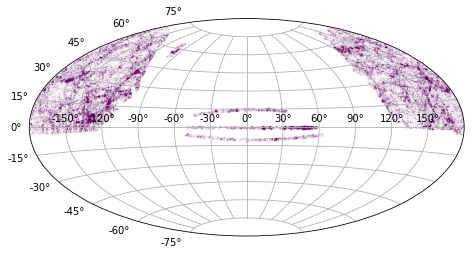

In [7]:
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units

fig = plt.figure(figsize=(8, 4))
fig.add_subplot(111, projection='aitoff')
plt.grid(True)

########################### gx #######################################
coords_gx = SkyCoord(data.ra, data.dec, unit='degree')
ra_gx = coords_gx.ra.wrap_at(180*  units.deg).radian
dec_gx = coords_gx.dec.radian
plt.scatter(ra_gx,dec_gx,marker='.',color='purple',s=0.001)